<a href="https://colab.research.google.com/github/Joe270585/Reducao_Dimensionalidade_Imagens/blob/main/Reducao_de_Dimensionalidade_em_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas

import tkinter as tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files

# Processamento Simples de Imagens em Python

Este projeto demonstra um script simples em Python para carregar, converter para níveis de cinza e binarizar uma imagem, exibindo os resultados e oferecendo a opção de salvar a imagem processada.

## Funcionalidades

*   Carregar uma imagem localmente no ambiente Google Colab.
*   Converter a imagem RGB para níveis de cinza.
*   Binarizar a imagem em níveis de cinza usando um threshold baseado na média dos pixels.
*   Exibir a imagem original, em níveis de cinza e binarizada.
*   Permitir ao usuário salvar a imagem combinada com os resultados.

## Requisitos

*   Python 3.6+
*   Bibliotecas Python: `tkinter`, `matplotlib`, `numpy`, `google.colab`

As bibliotecas `tkinter` e `google.colab` são específicas para o ambiente Google Colab. Se você deseja executar este código localmente fora do Colab, será necessário ajustar o código para lidar com o carregamento e salvamento de arquivos de forma diferente (por exemplo, usando `PIL` ou `cv2` para leitura/escrita de imagens e `os` para manipulação de arquivos).

## Como Executar

Este código foi desenvolvido para ser executado no Google Colab. Siga os passos abaixo:

1.  Abra este notebook no Google Colab.
2.  Execute todas as células do notebook na ordem em que aparecem.
3.  Quando a célula principal for executada, você será solicitado a selecionar uma imagem para processar. Clique no botão para fazer o upload da sua imagem.
4.  O script processará a imagem e exibirá a imagem original, em níveis de cinza e binarizada.
5.  Você será perguntado se deseja salvar a imagem combinada. Digite 's' para sim ou 'n' para não e pressione Enter.
6.  Se você escolher salvar, será solicitado a digitar um nome para o arquivo de saída.

## Código

O código está dividido em células para melhor organização no ambiente Colab:

*   **Célula 1:** Importa as bibliotecas necessárias.
*   **Célula 2:** Define as funções para carregar, ler, converter para cinza, binarizar, exibir e salvar imagens.
*   **Célula 3:** A célula principal que coordena a execução das funções, permitindo a interação com o usuário para carregar a imagem e decidir se deseja salvar os resultados.

## Observações

*   A conversão para níveis de cinza utiliza os pesos padrão (0.299, 0.587, 0.114) para os canais R, G e B, respectivamente.
*   A binarização utiliza um threshold global calculado como a média dos valores de pixel da imagem em níveis de cinza.

## Contribuições

Contribuições são bem-vindas! Sinta-se à vontade para abrir issues ou pull requests no repositório do GitHub.

In [ ]:
# Definindo as funções

# Carregando imagem
def carregar_imagem():
    print("=" * 70)
    print("Selecione uma imagem para iniciar o processamento...")
    uploaded = files.upload()
    if not uploaded:
        return None
    # Obtendo o nome do arquivo selecionado
    caminho_imagem = list(uploaded.keys())[0]
    print(f"Imagem selecionada: {caminho_imagem}")
    return caminho_imagem

# Ler o caminho da imagem
def ler_imagem(path):
    img = mpimg.imread(path)
    if img.shape[2] == 4:
        img = img[:, :, :3]
    return img

# Convertendo imagem para cinza
def converter_para_cinza(img_rgb):
    altura, largura, _ = img_rgb.shape
    img_cinza = np.zeros((altura, largura), dtype=np.uint8)
    w_r, w_g, w_b = 0.299, 0.587, 0.114
    for i in range(altura):
        for j in range(largura):
            r, g, b = img_rgb[i][j]

            # Assumindo que a imagem é carregada como valores float entre 0 e 1
            if r <= 1.0 and g <= 1.0 and b <= 1.0:
                cinza = int((w_r * r + w_g * g + w_b * b) * 255)
            else:
                cinza = int(w_r * r + w_g * g + w_b * b)

            img_cinza[i][j] = np.clip(cinza, 0, 255)
    return img_cinza

# Convertendo a imagem para preto e brnaco (Binarização)
def binarizar(img_cinza):
    media = int(np.mean(img_cinza))
    print(f"Threshold para binarização: {media}")
    img_bin = np.where(img_cinza >= media, 255, 0).astype(np.uint8)
    return img_bin

# Exibindo e salvando as imagens (orin=ginal e modificadas)
def exibir_e_salvar(original, cinza, binaria):
    fig, axs = plt.subplots(2, 3, figsize=(18, 9))  # ~600x450 px cada imagem

    axs[0][0].imshow(original)
    axs[0][0].set_title("Figura 1: Original")
    axs[0][0].axis('off')

    axs[0][1].imshow(cinza, cmap='gray')
    axs[0][1].set_title("Figura 2: Níveis de Cinza")
    axs[0][1].axis('off')

    axs[0][2].imshow(binaria, cmap='gray')
    axs[0][2].set_title("Figura 3: Preto e Branco")
    axs[0][2].axis('off')

    # Descrição centralizada
    descricao = ("Imagem alterada com sucesso!!" )

    axs[1][0].text(0.5, 0.5, descricao, ha='center', va='center', fontsize=15, wrap=True)
    axs[1][0].axis('off')
    axs[1][1].axis('off')
    axs[1][2].axis('off')



    plt.tight_layout(rect=[0, 0.08, 1, 0.94])
    plt.show()

    salvar = input("\nDeseja salvar a imagem combinada com os resultados? (s/n): ").strip().lower()
    if salvar == 's':
        # Use google.colab.files to download the file
        caminho_saida = input("Digite o nome do arquivo para salvar (ex: output.png): ").strip()
        if caminho_saida:
            # Save the figure to a temporary file
            fig.savefig("temp_output.png", dpi=100)
            # Download the temporary file
            files.download("temp_output.png")
            print(f"Imagem salva como: {caminho_saida}")
        else:
            print("Salvamento cancelado.")

Selecione uma imagem para iniciar o processamento...


Saving OIP.jpeg to OIP.jpeg
Imagem selecionada: OIP.jpeg
Threshold para binarização: 93


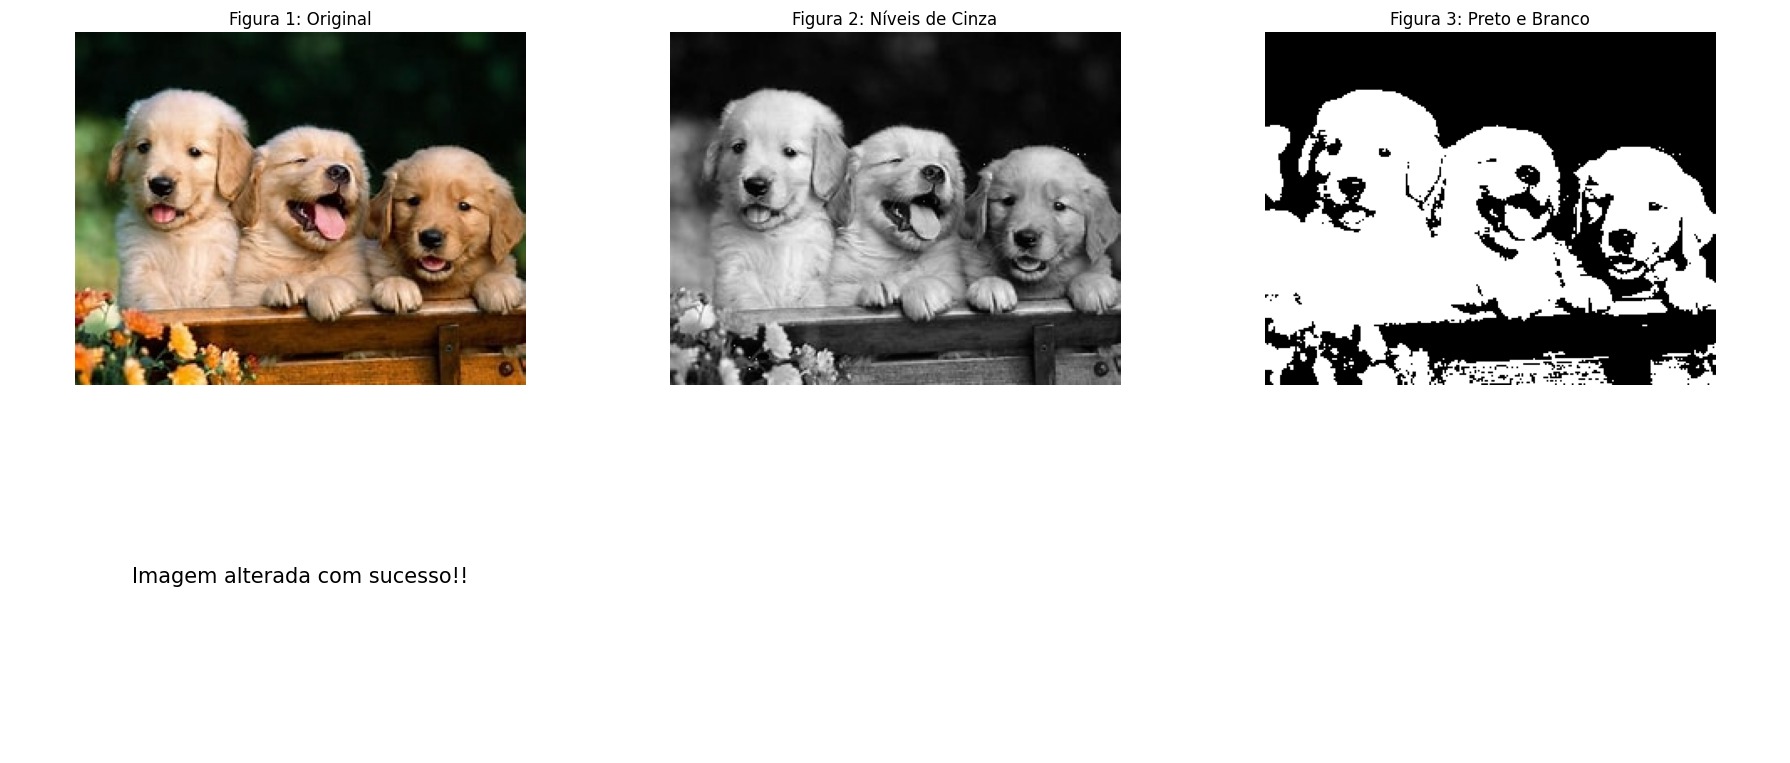


Deseja salvar a imagem combinada com os resultados? (s/n): n

Processo concluído. Pressione ENTER para sair...


In [ ]:
# Gerando a interface para escolha da imagem e salvar ou não a imagem com suas respectivas alterações

if __name__ == "__main__":
    caminho = carregar_imagem()
    if not caminho:
        print("Nenhuma imagem selecionada.")
    else:
        imagem_rgb = ler_imagem(caminho)
        imagem_cinza = converter_para_cinza(imagem_rgb)
        imagem_binaria = binarizar(imagem_cinza)
        exibir_e_salvar(imagem_rgb, imagem_cinza, imagem_binaria)
        input("\nProcesso concluído. Pressione ENTER para sair...")